# Financial Planning with APIs and Simulations

In this Challenge, you’ll create two financial analysis tools by using a single Jupyter notebook:

Part 1: A financial planner for emergencies. The members will be able to use this tool to visualize their current savings. The members can then determine if they have enough reserves for an emergency fund.

Part 2: A financial planner for retirement. This tool will forecast the performance of their retirement portfolio in 30 years. To do this, the tool will make an Alpaca API call via the Alpaca SDK to get historical price data for use in Monte Carlo simulations.

You’ll use the information from the Monte Carlo simulation to answer questions about the portfolio in your Jupyter notebook.



In [1]:
# Import the required libraries and dependencies
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load the environment variables from the .env file
load_dotenv("api.env") # You will first need to create a .env file that holds your personal Alpaca API credentials

True

## Part 1: Create a Financial Planner for Emergencies

### Evaluate the Cryptocurrency Wallet by Using the Requests Library

In this section, you’ll determine the current value of a member’s cryptocurrency wallet. You’ll collect the current prices for the Bitcoin and Ethereum cryptocurrencies by using the Python Requests library. For the prototype, you’ll assume that the member holds the 1.2 Bitcoins (BTC) and 5.3 Ethereum coins (ETH). To do all this, complete the following steps:

1. Create a variable named `monthly_income`, and set its value to `12000`.

2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplies.

3. Navigate the JSON response object to access the current price of each coin, and store each in a variable.

    > **Hint** Note the specific identifier for each cryptocurrency in the API JSON response. The Bitcoin identifier is `1`, and the Ethereum identifier is `1027`.

4. Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.



In [3]:
# Set the current number of coins for each cryptocurrency asset held in the portfolio
btc_coins = 1.2
eth_coins = 5.3

#### Step 1: Create a variable named `monthly_income`, and set its value to `12000`.

In [4]:
# Set the monthly amount for the member's household income
household_income = 12000

#### Review the endpoint URLs for the API calls to Free Crypto API in order to get the current pricing information for both BTC and ETH.

In [5]:
# Set the API endpoint URLs for the held cryptocurrency assets 
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

#### Step 2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplied.

In [6]:
# Call the API to access the current price of BTC
btc_response = requests.get(btc_url).json()

# Review JSON response to understand the data structure, column names and data points
print(json.dumps(btc_response, indent=4, sort_keys=True))

{
    "data": {
        "1": {
            "circulating_supply": 19021237,
            "id": 1,
            "last_updated": 1650838691,
            "max_supply": 21000000,
            "name": "Bitcoin",
            "quotes": {
                "USD": {
                    "market_cap": 752848255707,
                    "percent_change_1h": 0.725225107514239,
                    "percent_change_24h": -0.273486419575362,
                    "percent_change_7d": -1.59517547740861,
                    "percentage_change_1h": 0.725225107514239,
                    "percentage_change_24h": -0.273486419575362,
                    "percentage_change_7d": -1.59517547740861,
                    "price": 39805.0,
                    "volume_24h": 17223895860
                }
            },
            "rank": 1,
            "symbol": "BTC",
            "total_supply": 19021237,
            "website_slug": "bitcoin"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurre

In [7]:
# Call the API to access the current price of ETH
eth_response = requests.get(eth_url).json()

# Review JSON response to understand the data structure, column names and data points
print(json.dumps(eth_response, sort_keys=True, indent=4))

{
    "data": {
        "1027": {
            "circulating_supply": 120514158,
            "id": 1027,
            "last_updated": 1650838664,
            "max_supply": 0,
            "name": "Ethereum",
            "quotes": {
                "USD": {
                    "market_cap": 354496911592,
                    "percent_change_1h": 0.411105365077536,
                    "percent_change_24h": -0.382921744883512,
                    "percent_change_7d": -3.66190694561059,
                    "percentage_change_1h": 0.411105365077536,
                    "percentage_change_24h": -0.382921744883512,
                    "percentage_change_7d": -3.66190694561059,
                    "price": 2954.07,
                    "volume_24h": 9118248958
                }
            },
            "rank": 2,
            "symbol": "ETH",
            "total_supply": 120514158,
            "website_slug": "ethereum"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocur

#### Step 3: Navigate the JSON response object to access the current price of each coin, and store each in a variable.

In [8]:
# Set the current BTC price as a variable, based on the response received above and print
btc_price = btc_response['data']['1']['quotes']['USD']['price']

print(f'The price of Bitcoin is ${btc_price} USD')

The price of Bitcoin is $39805.0 USD


In [9]:
# Set the current ETH price as a variable, based on the response received above and print
eth_price = eth_response['data']['1027']['quotes']['USD']['price']

print(f'The price of Ethereum is ${eth_price} USD')

The price of Ethereum is $2954.07 USD


### Step 4: Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.

In [10]:
# Compute the current value of the BTC holding using the current BTC price and total coins held in the wallet and print
btc_value = btc_price * btc_coins

print(f' The total holding of Bitcoin in USD is ${round(btc_value,2)}')

 The total holding of Bitcoin in USD is $47766.0


In [11]:
# Compute the current value of the ETH holding using the current ETH price and total coins held in the wallet and print
eth_value = eth_price * eth_coins

print(f' The total holding of Ethereum in USD is ${round(eth_value,2)}')

 The total holding of Ethereum in USD is $15656.57


In [12]:
# Compute the total value of the cryptocurrency wallet and print
total_crypto_wallet = btc_value + eth_value

print(f' The total crypto wallet is worth ${round(total_crypto_wallet,2)} USD')

 The total crypto wallet is worth $63422.57 USD


### Evaluate the Stock and Bond Holdings by Using the Alpaca SDK

In this section, you’ll determine the current value of a member’s stock and bond holdings. You’ll make an API call to Alpaca via the Alpaca SDK to get the current closing prices of the SPDR S&P 500 ETF Trust (ticker: SPY) and of the iShares Core US Aggregate Bond ETF (ticker: AGG). For the prototype, assume that the member holds 110 shares of SPY, which represents the stock portion of their portfolio, and 200 shares of AGG, which represents the bond portion. To do all this, complete the following steps:

1. In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

2. Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

3. Set the following parameters for the Alpaca API call:

    - `tickers`: Use the tickers for the member’s stock and bond holdings.

    - `timeframe`: Use a time frame of one day.

    - `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.

4. Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

5. Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

6. Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.


#### Review the total number of shares held in both (SPY) and (AGG).

In [13]:
# Set the current amount of shares held in both the stock (SPY) and bond (AGG) portion of the portfolio.
spy_shares = 110
agg_shares = 200

#### Step 1: In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

#### Step 2: Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

In [14]:
# Set the variables for the Alpaca API and secret keys
alpaca_api_key = os.getenv('ALPACA_API_KEY')
alpaca_secret_key = os.getenv('ALPACA_SECRET_KEY')

# Create the Alpaca tradeapi.REST object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version='v2')

#### Step 3: Set the following parameters for the Alpaca API call:

- `tickers`: Use the tickers for the member’s stock and bond holdings.

- `timeframe`: Use a time frame of one day.

- `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.


In [15]:
# Set the tickers for both the stock (SPY) and bond (AGG) portions of the portfolio
tickers = ['SPY', 'AGG']

# Set timeframe to one day
timeframe = '1Day'

# Set the start and end dates. In this expample we will be using one trading day so the start and end should be the same
start_date = pd.Timestamp('2022-04-14', tz = 'America/New_York',).isoformat() # Ensure to format dates in ISO format
end_date = pd.Timestamp('2022-04-14', tz = 'America/New_York',).isoformat() # Ensure to format dates in ISO format

#### Step 4: Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

In [16]:
# Get the current closing prices for the portfolio and create a dataframe with the output. Display the output
spy_agg_portfolio_df = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

display(spy_agg_portfolio_df)

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2022-04-14 04:00:00+00:00,104.73,104.7400,103.93,103.97,8505987,30443,104.171733,AGG
2022-04-14 04:00:00+00:00,443.44,444.7301,437.68,437.79,98667135,703727,440.305786,SPY


In [17]:
# To reorganize the DataFrame, first separate the ticker data
spy = spy_agg_portfolio_df[spy_agg_portfolio_df['symbol']=='SPY'].drop('symbol', axis=1)
agg = spy_agg_portfolio_df[spy_agg_portfolio_df['symbol']=='AGG'].drop('symbol', axis=1)

display(spy)
display(agg)

,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,
2022-04-14 04:00:00+00:00,443.44,444.7301,437.68,437.79,98667135,703727,440.305786


,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,
2022-04-14 04:00:00+00:00,104.73,104.74,103.93,103.97,8505987,30443,104.171733


In [18]:
# Finish reorganizing the dataframe by concatenating the ticker dataframes. Review to ensure the SPY and AGG values for a given timestamp appear in one row.
spy_agg_portfolio_df = pd.concat([spy,agg],axis=1, keys=['SPY', 'AGG'])

spy_agg_portfolio_df

SPY                                      \
                             open      high     low   close    volume   
timestamp                                                               
2022-04-14 04:00:00+00:00  443.44  444.7301  437.68  437.79  98667135   

                                                      AGG                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2022-04-14 04:00:00+00:00      703727  440.305786  104.73  104.74  103.93   

                                                                    
                            close   volume trade_count        vwap  
timestamp                                                           
2022-04-14 04:00:00+00:00  103.97  8505987       30443  104.171733

#### Step 5: Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

In [19]:
# Access the closing price for AGG and convert to a float for later analysis. Print the output
agg_close_price = float(agg["close"])

# Print the AGG closing price
print(f'The close price for AGG was ${agg_close_price} USD')

The close price for AGG was $103.97 USD


In [20]:
# Access the closing price for SPY and convert to a float for later analysis. Print the output
spy_close_price = float(spy["close"])

print(f'The close price for SPY was ${spy_close_price} USD')

The close price for SPY was $437.79 USD


#### Step 6: Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.

In [21]:
# Calculate the current value of the bond portion of the portfolio and print
agg_value = agg_shares * agg_close_price

print(f'The current value of the bond portion of the portfolio is ${agg_value} USD')

The current value of the bond portion of the portfolio is $20794.0 USD


In [22]:
# Calculate the current value of the stock portion of the portfolio and print
spy_value = spy_shares * spy_close_price

print(f'The current value of the stock portion of the portfolio is ${spy_value} USD')

The current value of the stock portion of the portfolio is $48156.9 USD


In [23]:
# Calculate the total value of the stock and bond portion of the portfolio and print
total_stocks_bonds = agg_value + spy_value

print(f'The current value of the stock and bond portion of the portfolio is ${total_stocks_bonds} USD')

The current value of the stock and bond portion of the portfolio is $68950.9 USD


In [24]:
# Calculate the total value of the member's entire savings portfolio by adding the stock/bond and crypto portfolios together. Print the output
total_portfolio = total_crypto_wallet + total_stocks_bonds

print(f'The current value of the entire portfolio, inclusive of stocks, bonds and crypto is ${round(total_portfolio,2)} USD')

The current value of the entire portfolio, inclusive of stocks, bonds and crypto is $132373.47 USD


### Evaluate the Emergency Fund

In this section, you’ll use the valuations for the cryptocurrency wallet and for the stock and bond portions of the portfolio to determine if the credit union member has enough savings to build an emergency fund into their financial plan. To do this, complete the following steps:

1. Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

2. Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

    - `savings_data`: Use the list that you just created.

    - `columns`: Set this parameter equal to a Python list with a single value called `amount`.

    - `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.

3. Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

4. Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

    1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of $12000. (You set this earlier in Part 1).

    2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

        1. If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

        2. Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

        3. Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


#### Step 1: Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

In [25]:
# Consolidate crypto wallet value and total stock/bond value into a Python list and review the output
savings_data = [total_crypto_wallet, total_stocks_bonds]

print(savings_data)

[63422.570999999996, 68950.9]


#### Step 2: Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

- `savings_data`: Use the list that you just created.

- `columns`: Set this parameter equal to a Python list with a single value called `amount`.

- `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.


In [26]:
# Store the python list as a dataframe and review the output
savings_df = pd.DataFrame(savings_data, index=['crypto','stock/bond'], columns=['amount'])

display(savings_df)

,amount
crypto,63422.571
stock/bond,68950.900


#### Step 3: Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

<AxesSubplot:title={'center':'Portfolio Composition'}, ylabel='amount'>

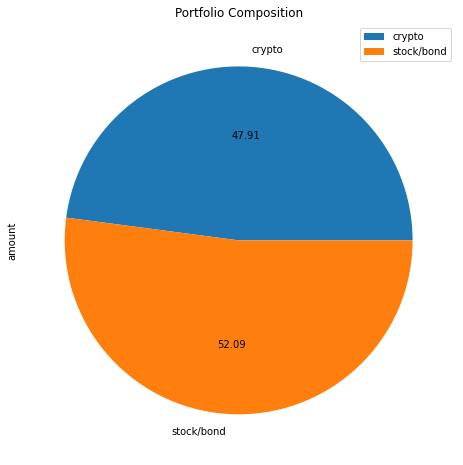

In [27]:
# Plot the total value of the member's portfolio composition (crypto and stock/bond) in a pie chart
savings_df.plot.pie(y='amount', title='Portfolio Composition', figsize=(10,8), autopct='%.2f')

#### Step 4: Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

Step 1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

Step 2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


##### Step 4-1: Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

In [28]:
# Create a variable named emergency_fund_value and set to 3x household income
emergency_fund_value = household_income * 3

##### Step 4-2: Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)

In [29]:
# Evaluate the possibility of creating an emergency fund with 3 conditions:
if total_portfolio > emergency_fund_value:
    print(f'Congratulations! Your portfolio is large enough to be an emergency fund and currently contains ${round(total_portfolio,2)} USD.')
elif total_portfolio == emergency_fund_value:
    print(f'Congratulations! Your portfolio is now large enough to become an emergency fund.')
else:
    print(f'Your potfolio is ${round(emergency_fund_value - total_portfolio, 2)} USD away from being an emergency fund')

Congratulations! Your portfolio is large enough to be an emergency fund and currently contains $132373.47 USD.


## Part 2: Create a Financial Planner for Retirement

### Create the Monte Carlo Simulation

In this section, you’ll use the MCForecastTools library to create a Monte Carlo simulation for the member’s savings portfolio. To do this, complete the following steps:

1. Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

2. Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.The following image shows the overlay line plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the resulting plot.](Images/5-4-monte-carlo-line-plot.png)

3. Plot the probability distribution of the Monte Carlo simulation. Plot the probability distribution of the Monte Carlo simulation. The following image shows the histogram plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the histogram plot.](Images/5-4-monte-carlo-histogram.png)

4. Generate the summary statistics for the Monte Carlo simulation.



#### Step 1: Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

In [30]:
# Set the tickers of the stocks for which we are fetching historical data
tickers = ['SPY' , 'AGG']

# Set the timeframe
timeframe = '1Day'

# Set the start and end dates. In this expample we will be using one trading day so the start and end should be the same
start_date = pd.Timestamp('2019-04-18', tz = 'America/New_York',).isoformat() # Ensure to format dates in ISO format
end_date = pd.Timestamp('2022-04-14', tz = 'America/New_York',).isoformat() # Ensure to format dates in ISO format

# Set number of rows to 1000 to retrieve the maximum amount of rows
limit_rows = 10000

In [31]:
# Use the Alpaca get_bars function to make the API call to get the 3 years worth of pricing data
spy_agg_portfolio_df = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=limit_rows
).df

# To reorganize the DataFrame, first separate the ticker data
spy = spy_agg_portfolio_df[spy_agg_portfolio_df['symbol']=='SPY'].drop('symbol', axis=1)
agg = spy_agg_portfolio_df[spy_agg_portfolio_df['symbol']=='AGG'].drop('symbol', axis=1)

# Finish reorganizing the dataframe by concatenating the ticker dataframes. Review to ensure the SPY and AGG values for a given timestamp
# appear in one row.
spy_agg_portfolio_df = pd.concat([spy,agg],axis=1, keys=['SPY', 'AGG'])

# Display both the first and last five rows of the DataFrame
display(spy_agg_portfolio_df.head())
display(spy_agg_portfolio_df.tail())

SPY                                     \
                             open     high     low   close    volume   
timestamp                                                              
2019-04-18 04:00:00+00:00  290.12  290.320  288.66  290.02  69414428   
2019-04-22 04:00:00+00:00  289.17  290.435  289.07  290.27  40520264   
2019-04-23 04:00:00+00:00  290.68  293.140  290.42  292.88  52411775   
2019-04-24 04:00:00+00:00  292.76  293.160  292.07  292.23  50469550   
2019-04-25 04:00:00+00:00  292.12  292.780  290.73  292.05  57875137   

                                                      AGG                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2019-04-18 04:00:00+00:00      231296  289.794161  108.23  108.29  108.16   
2019-04-22 04:00:00+00:00      170767  290.002934  108.13  108.16  108.05   
2019-04-23 04:00:00+00:00      232023  292.102165  108.18  108.28  108.15   
2019-04-24 04:00:00+00:00      203858  292.580824  108.42  108.53  108.42   
2019-04-25 04:00:00+00:00      238260  292.051720  108.50  108.55  108.42   

                                                                    
                            close   volume trade_count        vwap  
timestamp                                                           
2019-04-18 04:00:00+00:00  108.19  2217221        8388  108.211849  
2019-04-22 04:00:00+00:00  108.06  5725616        9161  108.098893  
2019-04-23 04:00:00+00:00  108.25  3422712       10779  108.236718  
2019-04-24 04:00:00+00:00  108.50  3000163       10192  108.496809  
2019-04-25 04:00:00+00:00  108.49  2648150        9121  108.473969

SPY                                        \
                             open      high       low   close    volume   
timestamp                                                                 
2022-04-08 04:00:00+00:00  448.04  450.6300  445.9400  447.57  79148376   
2022-04-11 04:00:00+00:00  444.11  445.0000  439.3900  439.92  89825549   
2022-04-12 04:00:00+00:00  443.02  445.7500  436.6501  438.29  84020734   
2022-04-13 04:00:00+00:00  437.96  444.1100  437.8400  443.31  73734315   
2022-04-14 04:00:00+00:00  443.44  444.7301  437.6800  437.79  98667135   

                                                      AGG                    \
                          trade_count        vwap    open     high      low   
timestamp                                                                     
2022-04-08 04:00:00+00:00      573491  448.250805  104.82  105.010  104.615   
2022-04-11 04:00:00+00:00      779421  442.206374  104.44  104.505  104.170   
2022-04-12 04:00:00+00:00      694115  440.815476  104.83  104.920  104.580   
2022-04-13 04:00:00+00:00      563285  441.262058  104.77  105.090  104.740   
2022-04-14 04:00:00+00:00      703727  440.305786  104.73  104.740  103.930   

                                                                    
                            close   volume trade_count        vwap  
timestamp                                                           
2022-04-08 04:00:00+00:00  104.73  6501822       24900  104.804999  
2022-04-11 04:00:00+00:00  104.28  8377902       29767  104.312835  
2022-04-12 04:00:00+00:00  104.61  8448652       29955  104.740856  
2022-04-13 04:00:00+00:00  104.82  6868550       27348  104.889799  
2022-04-14 04:00:00+00:00  103.97  8505987       30443  104.171733

#### Step 2: Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.

In [32]:
# Configure the Monte Carlo simulation to forecast 30 years cumulative returns
mc_30_year = MCSimulation(
    portfolio_data = spy_agg_portfolio_df,
    weights = [.60,.40], # Set the portfolio weights to 60% AGG and 40% SPY
    num_simulation = 500, # Run 500 simulations
    num_trading_days = 252 * 30 # Set the number of trading days to 30 years
)
    
# Review the simulation input data
mc_30_year.portfolio_data.head()

SPY                                     \
                             open     high     low   close    volume   
timestamp                                                              
2019-04-18 04:00:00+00:00  290.12  290.320  288.66  290.02  69414428   
2019-04-22 04:00:00+00:00  289.17  290.435  289.07  290.27  40520264   
2019-04-23 04:00:00+00:00  290.68  293.140  290.42  292.88  52411775   
2019-04-24 04:00:00+00:00  292.76  293.160  292.07  292.23  50469550   
2019-04-25 04:00:00+00:00  292.12  292.780  290.73  292.05  57875137   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2019-04-18 04:00:00+00:00      231296  289.794161          NaN  108.23   
2019-04-22 04:00:00+00:00      170767  290.002934     0.000862  108.13   
2019-04-23 04:00:00+00:00      232023  292.102165     0.008992  108.18   
2019-04-24 04:00:00+00:00      203858  292.580824    -0.002219  108.42   
2019-04-25 04:00:00+00:00      238260  292.051720    -0.000616  108.50   

                                                                        \
                             high     low   close   volume trade_count   
timestamp                                                                
2019-04-18 04:00:00+00:00  108.29  108.16  108.19  2217221        8388   
2019-04-22 04:00:00+00:00  108.16  108.05  108.06  5725616        9161   
2019-04-23 04:00:00+00:00  108.28  108.15  108.25  3422712       10779   
2019-04-24 04:00:00+00:00  108.53  108.42  108.50  3000163       10192   
2019-04-25 04:00:00+00:00  108.55  108.42  108.49  2648150        9121   

                                                    
                                 vwap daily_return  
timestamp                                           
2019-04-18 04:00:00+00:00  108.211849          NaN  
2019-04-22 04:00:00+00:00  108.098893    -0.001202  
2019-04-23 04:00:00+00:00  108.236718     0.001758  
2019-04-24 04:00:00+00:00  108.496809     0.002309  
2019-04-25 04:00:00+00:00  108.473969    -0.000092

In [33]:
# Run the Monte Carlo simulation
mc_30_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/Ryanderson/Desktop/FintechBootcamp/ChallengeFiles/Challenges/Challenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.003623,1.010740,1.004160,0.994125,0.995296,1.005584,0.992913,1.010336,1.011662,1.002601,...,1.002046,1.005811,0.998120,1.006552,1.013212,1.017910,1.011850,1.008213,0.992081,0.999776
2,0.994808,1.024347,0.995384,0.993792,0.993569,1.014992,0.980270,1.003722,1.003000,1.009375,...,1.006049,1.004962,1.002975,0.995181,0.996490,1.014791,1.027788,1.001400,0.995376,1.006222
3,1.000722,1.023518,0.992560,0.992575,0.985367,1.009831,0.978633,1.001749,0.998775,1.016387,...,1.002924,1.009516,1.007862,1.000917,0.983145,1.026806,1.020456,1.020408,0.994294,1.002250
4,0.992807,1.028389,0.995808,0.979118,0.986105,1.022141,0.979529,1.003909,0.996057,1.020187,...,0.996953,1.028840,1.010769,1.020493,0.975408,1.027852,1.017591,1.008956,0.992957,0.999243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,7.976831,6.714581,7.025526,26.718058,25.723543,8.333213,12.638700,8.136533,16.640584,42.288370,...,8.446989,30.220210,9.891200,4.116433,6.108643,12.490223,5.080937,6.828415,7.019272,17.364139
7557,8.070987,6.691022,6.928504,26.778675,25.779329,8.299168,12.732448,8.127139,16.690929,42.100707,...,8.621553,30.450081,9.897716,4.099409,6.054226,12.549582,5.068755,6.799378,7.062019,17.256818
7558,8.110561,6.722117,6.869124,26.671287,25.814365,8.323195,12.914007,8.235916,16.576813,42.345358,...,8.591035,30.941114,9.868497,4.013082,5.963910,12.712474,5.052645,6.798956,7.040022,17.021919
7559,8.157358,6.713922,6.804251,26.570208,25.670592,8.271475,13.063611,8.294467,16.948837,42.421087,...,8.645007,31.114155,9.957244,4.032755,6.044096,12.692913,5.080980,6.815745,7.085625,17.054919


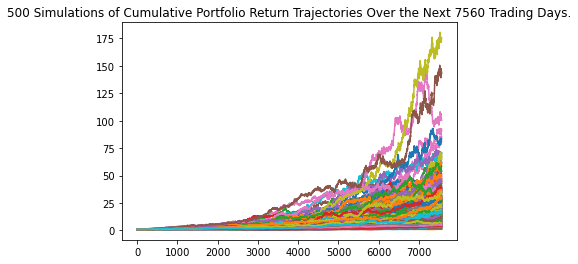

In [34]:
# Visualize the 30-year Monte Carlo simulation by creating a line plot
MC_sim_line_plot = mc_30_year.plot_simulation()

#### Step 3: Plot the probability distribution of the Monte Carlo simulation.

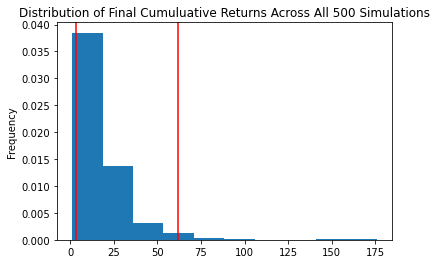

In [35]:
# Visualize the probability distribution of the 30-year Monte Carlo simulation 
# by plotting a histogram
MC_sum_dist_plot = mc_30_year.plot_distribution()

#### Step 4: Generate the summary statistics for the Monte Carlo simulation.

In [36]:
# Generate summary statistics from the 30-year Monte Carlo simulation results
# Save the results as a variable
MC_summary_statistics = mc_30_year.summarize_cumulative_return()

# Review the 30-year Monte Carlo summary statistics
print(MC_summary_statistics)

count           500.000000
mean             17.580320
std              16.868608
min               1.059936
25%               7.703662
50%              12.998831
75%              21.545004
max             175.683533
95% CI Lower      3.064132
95% CI Upper     61.813211
Name: 7560, dtype: float64


### Analyze the Retirement Portfolio Forecasts

Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the Monte Carlo simulation, answer the following question in your Jupyter notebook:

-  What are the lower and upper bounds for the expected value of the portfolio with a 95% confidence interval?


In [37]:
# Print the current balance of the stock and bond portion of the members portfolio
print(total_stocks_bonds)

68950.9


In [38]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_thirty_cumulative_return = MC_summary_statistics[8] * total_stocks_bonds
ci_upper_thirty_cumulative_return = MC_summary_statistics[9] * total_stocks_bonds

ci_upper_thirty_cumulative_return = round(ci_upper_thirty_cumulative_return,2)
ci_lower_thirty_cumulative_return = round(ci_lower_thirty_cumulative_return,2)

# Print the result of your calculations
print(ci_lower_thirty_cumulative_return)
print(ci_upper_thirty_cumulative_return)

211274.67
4262076.52


### Forecast Cumulative Returns in 10 Years

The CTO of the credit union is impressed with your work on these planning tools but wonders if 30 years is a long time to wait until retirement. So, your next task is to adjust the retirement portfolio and run a new Monte Carlo simulation to find out if the changes will allow members to retire earlier.

For this new Monte Carlo simulation, do the following: 

- Forecast the cumulative returns for 10 years from now. Because of the shortened investment horizon (30 years to 10 years), the portfolio needs to invest more heavily in the riskier asset&mdash;that is, stock&mdash;to help accumulate wealth for retirement. 

- Adjust the weights of the retirement portfolio so that the composition for the Monte Carlo simulation consists of 20% bonds and 80% stocks. 

- Run the simulation over 500 samples, and use the same data that the API call to Alpaca generated.

- Based on the new Monte Carlo simulation, answer the following questions in your Jupyter notebook:

    - Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

    - Will weighting the portfolio more heavily toward stocks allow the credit union members to retire after only 10 years?


In [39]:
# Configure a Monte Carlo simulation to forecast 10 years cumulative returns
mc_10_year = MCSimulation(
    portfolio_data = spy_agg_portfolio_df,
    weights = [.80,.20], # Set the portfolio weights to 20% AGG and 80% SPY
    num_simulation = 500, # Run 500 simulations
    num_trading_days = 252 * 10 # Set the number of trading days to 10 years
)
    
# Review the simulation input data
mc_10_year.portfolio_data.head()

SPY                                     \
                             open     high     low   close    volume   
timestamp                                                              
2019-04-18 04:00:00+00:00  290.12  290.320  288.66  290.02  69414428   
2019-04-22 04:00:00+00:00  289.17  290.435  289.07  290.27  40520264   
2019-04-23 04:00:00+00:00  290.68  293.140  290.42  292.88  52411775   
2019-04-24 04:00:00+00:00  292.76  293.160  292.07  292.23  50469550   
2019-04-25 04:00:00+00:00  292.12  292.780  290.73  292.05  57875137   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2019-04-18 04:00:00+00:00      231296  289.794161          NaN  108.23   
2019-04-22 04:00:00+00:00      170767  290.002934     0.000862  108.13   
2019-04-23 04:00:00+00:00      232023  292.102165     0.008992  108.18   
2019-04-24 04:00:00+00:00      203858  292.580824    -0.002219  108.42   
2019-04-25 04:00:00+00:00      238260  292.051720    -0.000616  108.50   

                                                                        \
                             high     low   close   volume trade_count   
timestamp                                                                
2019-04-18 04:00:00+00:00  108.29  108.16  108.19  2217221        8388   
2019-04-22 04:00:00+00:00  108.16  108.05  108.06  5725616        9161   
2019-04-23 04:00:00+00:00  108.28  108.15  108.25  3422712       10779   
2019-04-24 04:00:00+00:00  108.53  108.42  108.50  3000163       10192   
2019-04-25 04:00:00+00:00  108.55  108.42  108.49  2648150        9121   

                                                    
                                 vwap daily_return  
timestamp                                           
2019-04-18 04:00:00+00:00  108.211849          NaN  
2019-04-22 04:00:00+00:00  108.098893    -0.001202  
2019-04-23 04:00:00+00:00  108.236718     0.001758  
2019-04-24 04:00:00+00:00  108.496809     0.002309  
2019-04-25 04:00:00+00:00  108.473969    -0.000092

In [40]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
mc_10_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/Ryanderson/Desktop/FintechBootcamp/ChallengeFiles/Challenges/Challenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.992708,0.981119,0.986086,0.991865,1.012023,0.993898,0.994504,1.001541,1.006725,0.985174,...,1.009822,1.003276,1.011760,1.000169,1.026782,0.991916,1.005269,1.001577,1.016872,0.999904
2,0.987831,0.989164,0.992404,0.997239,1.017821,0.996197,1.013228,1.019699,1.001928,0.986675,...,1.008465,1.010361,1.019590,1.002134,1.040533,0.980877,1.019294,0.998109,1.003253,0.986309
3,0.976324,1.002168,0.974859,1.013539,0.996855,0.991207,1.004109,1.038461,1.017397,0.978065,...,0.997133,1.020234,1.021471,1.000567,1.061132,0.960168,1.037432,0.998458,1.000621,0.982871
4,0.968925,1.020843,0.977058,1.028994,0.995005,0.995176,1.018540,1.044937,1.021374,0.971559,...,0.987663,1.020664,1.013835,0.978494,1.068171,0.971334,1.030075,0.994379,1.013403,0.983147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.744244,2.483629,3.571021,3.115465,7.156269,4.699244,5.483924,3.006716,1.970708,3.349398,...,2.508746,1.149538,1.797913,2.826513,1.916014,1.791249,2.138299,13.182563,4.465641,4.462941
2517,2.780242,2.520712,3.596970,3.093365,7.033119,4.673476,5.448373,3.039608,2.017663,3.274825,...,2.538914,1.146064,1.762378,2.820341,1.874300,1.814433,2.158154,13.009201,4.527337,4.471506
2518,2.764324,2.507768,3.495747,3.112874,7.030376,4.673308,5.470060,3.115251,2.008458,3.207263,...,2.551827,1.158917,1.739289,2.826503,1.888664,1.817701,2.179553,13.002068,4.582264,4.503060
2519,2.740243,2.496681,3.537611,3.220106,7.012965,4.704594,5.483248,3.048195,2.016673,3.167311,...,2.509220,1.160840,1.744628,2.840797,1.870009,1.846444,2.176798,13.012994,4.654092,4.487109


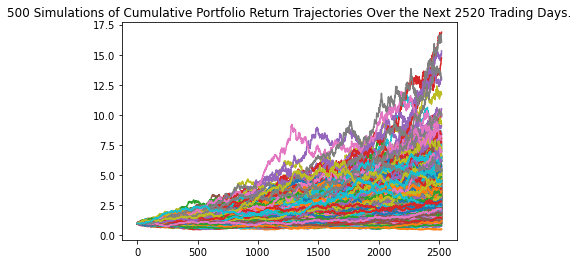

In [41]:
# Visualize the 10-year Monte Carlo simulation by creating an
# overlay line plot
MC_10_sum_line_plot = mc_10_year.plot_simulation()

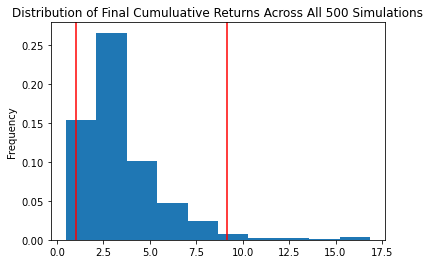

In [42]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation 
# by plotting a histogram
MC_10_sum_dist_plot = mc_10_year.plot_distribution()

In [43]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
# Save the results as a variable
MC_10_summary_statistics = mc_10_year.summarize_cumulative_return()


# Review the 10-year Monte Carlo summary statistics
print(MC_10_summary_statistics)

count           500.000000
mean              3.506448
std               2.226871
min               0.477477
25%               2.104131
50%               2.985134
75%               4.185915
max              16.864687
95% CI Lower      1.026965
95% CI Upper      9.150210
Name: 2520, dtype: float64


### Answer the following questions:

#### Question: Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

In [44]:
# Print the current balance of the stock and bond portion of the members portfolio
print(total_stocks_bonds)


68950.9


In [45]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_ten_cumulative_return = MC_10_summary_statistics[8] * total_stocks_bonds
ci_upper_ten_cumulative_return = MC_10_summary_statistics[9] * total_stocks_bonds

ci_lower_ten_cumulative_return = round(ci_lower_ten_cumulative_return,2)
ci_upper_ten_cumulative_return = round(ci_upper_ten_cumulative_return,2)

# Print the result of your calculations
print(ci_lower_ten_cumulative_return)
print(ci_upper_ten_cumulative_return)

70810.18
630915.18


#### Question: Will weighting the portfolio more heavily to stocks allow the credit union members to retire after only 10 years?